# SI 370: Contingency tables, crosstabs, mosaic plots and chi-squared

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

Let's generate a data frame to play with:

In [9]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [10]:
df.head()

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car


One of the most basic transformations we can do is a crosstab.    Crosstabs are also called "contingency tables" or "two-way tables". Notice how similar it is to pivoting (or unstacking).

In [11]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


As usual, we would like to visualize our results:

In [12]:
import seaborn as sns

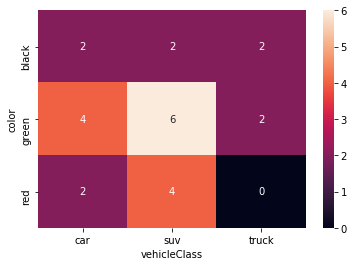

In [13]:
sns.heatmap(ct,annot=True)

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [14]:
titanic = pd.read_csv('data/titanic.csv')

In [15]:
titanic

,passtype,age,status,sex
0,third,child,dead,male
1,third,child,dead,male
2,third,child,dead,male
3,third,child,dead,male
4,third,child,dead,male
5,third,child,dead,male
6,third,child,dead,male
7,third,child,dead,male
8,third,child,dead,male
9,third,child,dead,male


Let's create a crosstab of the data:

In [42]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=True)

In [43]:
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


In [44]:
ct.columns

Index(['alive', 'dead', 'All'], dtype='object', name='status')

### Q1a: What are the "expected" proportions of "alive" and "dead" overall?

Overall, 32.3% (711/2201) of passengers lived, and 67.7% (1490/2201) died on the Titanic.

### Q1b: What's the expected number of expected alive and dead for each of the passenger types?

In [45]:
# if only the expect number of people died from each class type (multiply by the percentatges found above)
ct['aliveExp'] = ct['All'] * 0.323
ct['deadExp'] = ct['All'] * 0.677
ct.head()

status,alive,dead,All,aliveExp,deadExp
passtype,,,,,
crew,212,673,885,285.855,599.145
first,203,122,325,104.975,220.025
second,118,167,285,92.055,192.945
third,178,528,706,228.038,477.962
All,711,1490,2201,710.923,1490.077


### Q2: Generate a heatmap of the titanic survivorship data, showing the count of each cell.

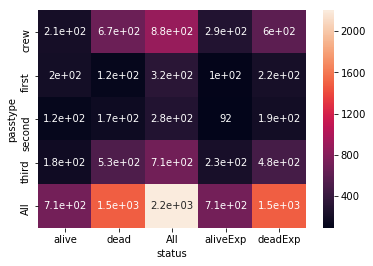

In [46]:
sns.heatmap(ct,annot=True)

### Q3: Improve your visualization by (1) excluding the marginal totals (i.e. the "All" column and the "All" row) and (2) formatting the cell labels so they appear as regular integers

In [47]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=False)

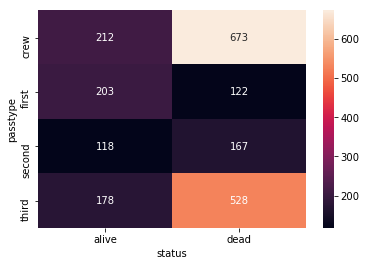

In [48]:
sns.heatmap(ct, annot=True, fmt='d')

### Q4: What does the above heatmap tell you?

It shows us how many people lived and died from each passenger type, and how those compare to each other. We can see that the most people died on the crew.

In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

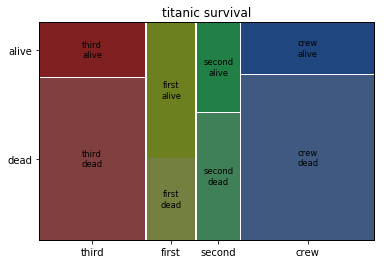

In [49]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

The width of the columns is proportional to the number in each "passtype"; the size of the vertical split is proportional to the percentage of alive vs. dead.

We can change the colors to make the plot a bit easier to read:

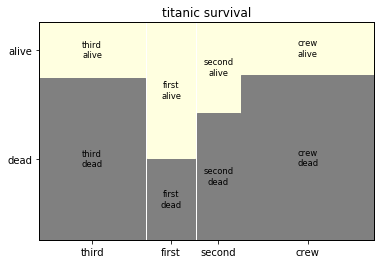

In [50]:
# slightly easier to read
props = lambda key: {'color': 'lightyellow' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

### Q5: What would the mosaic plot look like if there was no effect of passenger type on mortality?

If there were no effect, it would be a straight line across all of the passenger types. If we see a jagged mosaic plot, we konw that the variable on the x axis effects the y axis.

Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

The formula for calculating a $\chi^2$ statistic is:

$\chi^2=\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}$

The expected value for each cell in row i and column j is given by:

$E_{ij} = \frac{T_i \times T_j}{T_{tot}}$

### Q6: Use pandas and python to calculate the $\chi^2$ statistic for the titanic data

In [54]:
ct = pd.crosstab(titanic.passtype, titanic.status,margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


In [56]:
expected = ct.copy()
expected['alive'] = expected['All'] * expected.loc['All']['alive'] / expected.loc['All']['All']
expected['dead'] = expected['All'] * expected.loc['All']['dead'] / expected.loc['All']['All']

In [60]:
expected

status,alive,dead,All
passtype,,,
crew,285.885961,599.114039,885
first,104.986370,220.013630,325
second,92.064970,192.935030,285
third,228.062699,477.937301,706
All,711.000000,1490.000000,2201


In [57]:
observed_trimmed = ct.drop('All', axis=0).drop('All', axis=1)
expected_trimmed = expected.drop('All', axis=0).drop('All', axis=1)

In [58]:
observed_trimmed

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


In [59]:
expected_trimmed

status,alive,dead
passtype,,
crew,285.885961,599.114039
first,104.986370,220.013630
second,92.064970,192.935030
third,228.062699,477.937301


In [61]:
difference = (observed_trimmed - expected_trimmed)**2 / expected_trimmed

In [62]:
difference.columns

Index(['alive', 'dead'], dtype='object', name='status')

In [63]:
difference

status,alive,dead
passtype,,
crew,19.095499,9.112014
first,91.503990,43.663984
second,7.305990,3.486281
third,10.989407,5.243938


In [65]:
difference.loc['sum'] = difference.sum(axis=1)

In [68]:
difference

status,alive,dead
passtype,,
crew,19.095499,9.112014
first,91.503990,43.663984
second,7.305990,3.486281
third,10.989407,5.243938
sum,128.894886,61.506217


In [66]:
difference.loc['sum'] = difference.sum(axis=0)

In [69]:
# difference['sum']['sum']

### Chi-square the easy way

In [70]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.40110361683327
p-val =  6.705773035354302e-37
degree of freedom =  8
Expected:


,0,1,2
0,285.885961,599.114039,885.0
1,104.986370,220.013630,325.0
2,92.064970,192.935030,285.0
3,228.062699,477.937301,706.0
4,711.000000,1490.000000,2201.0


### Q7: What does this mean?  Is it consistent with your visual interpretation?

The probability of gettitng this number by chance is incredibly small (way less than 0.05). This means that there is a significant impact of passenger type on the survival rate of the passengers, with a degree of freedom of 8.

For the final part of today's class we're going to use the comic_characters.csv data set:

In [2]:
import pandas as pd

In [54]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


### Q8: Construct a contingency table of sex and alive status.

Use brief sentences to explain your findings.  



### Q9: Create a mosaic plot of sex and alive status.

### Q10: Conduct a $\chi^2$ test of ```sex``` and ```alive```. Print out the matrix of expected values as part of your answer